<a href="https://colab.research.google.com/github/InfinityKing48/AMATH582/blob/main/582_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path_to_train = '/content/drive/MyDrive/582 HW/HW2/MNIST_training_set.npy'
path_to_test = '/content/drive/MyDrive/582 HW/HW2/MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True).item()
d_test = np.load(path_to_test, allow_pickle=True).item()

Mounted at /content/drive


In [3]:
X_train, Y_train = d_train['features'], d_train['labels']
X_test, Y_test = d_test['features'], d_test['labels']

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2000, 256) (2000,) (500, 256) (500,)


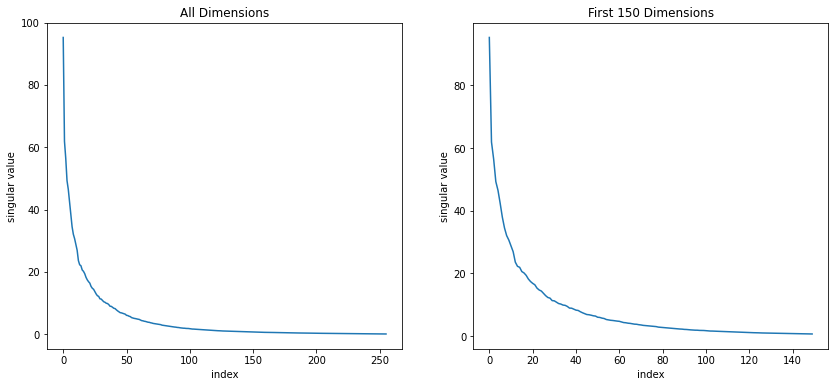

In [4]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

im1 = ax[0].plot(pca.singular_values_)
ax[0].set_title('All Dimensions')
ax[0].set_xlabel("index")
ax[0].set_ylabel("singular value")
im2 = ax[1].plot(pca.singular_values_[0:150])
ax[1].set_title('First 150 Dimensions')
ax[1].set_xlabel("index")
ax[1].set_ylabel("singular value")

plt.show()

In [5]:
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

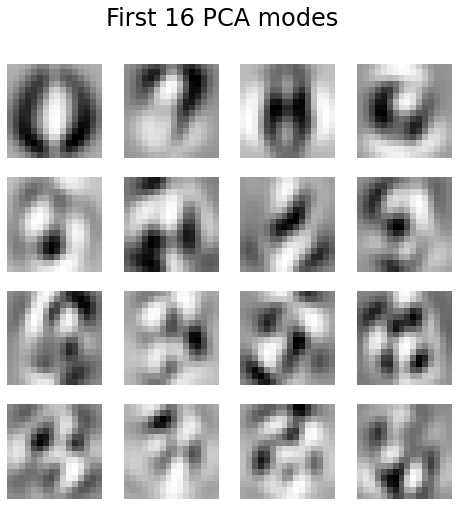

In [6]:
plot_digits(pca.components_, 4, "First 16 PCA modes")

In [7]:
Frob_norm = np.cumsum(pca.singular_values_**2)**0.5 / np.sum(pca.singular_values_**2)**0.5

print(np.where(Frob_norm >= 0.6)[0].min() + 1)
print(np.where(Frob_norm >= 0.8)[0].min() + 1)
print(np.where(Frob_norm >= 0.9)[0].min() + 1)

3
7
14


In [8]:
def reconstruction(data, N):
  pca = PCA(N)
  pca.fit(data)
  data_approx = pca.inverse_transform(pca.transform(data))

  return data_approx

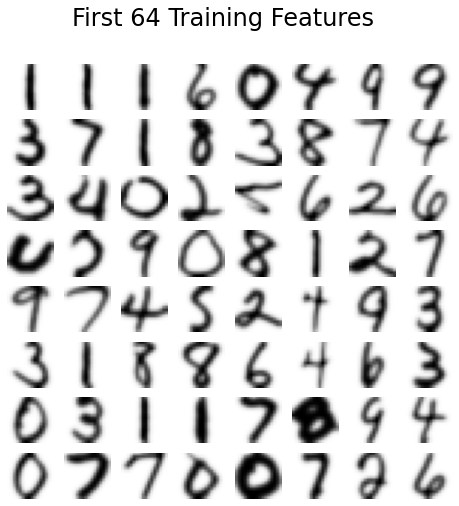

In [9]:
plot_digits(X_train, 8, "First 64 Training Features" )

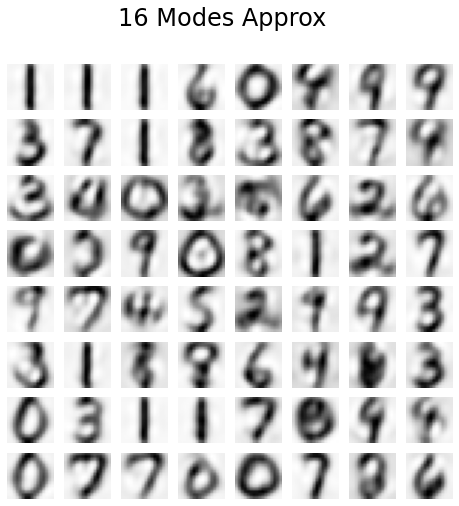

In [10]:
plot_digits(reconstruction(X_train, 16), 8, "16 Modes Approx" )

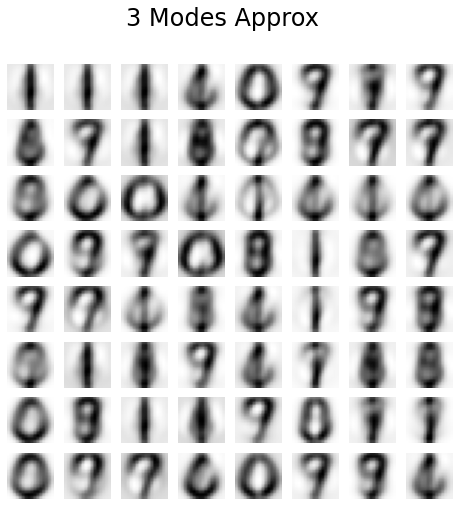

In [11]:
plot_digits(reconstruction(X_train, 3), 8, "3 Modes Approx" )

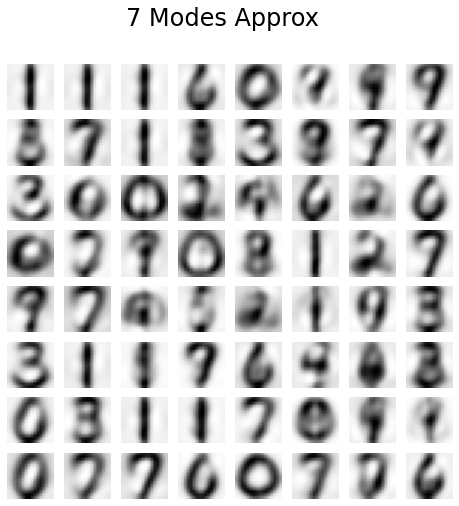

In [12]:
plot_digits(reconstruction(X_train, 7), 8, "7 Modes Approx" )

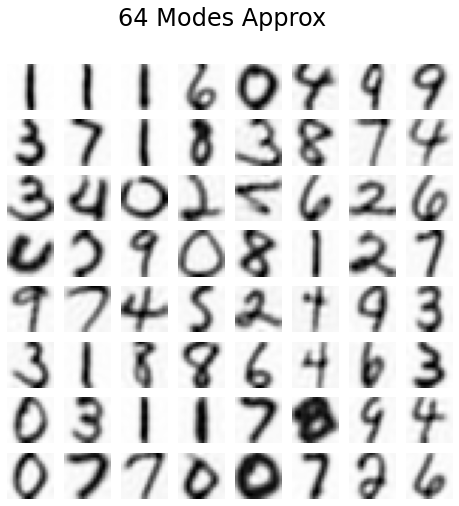

In [13]:
plot_digits(reconstruction(X_train, 64), 8, "64 Modes Approx" )

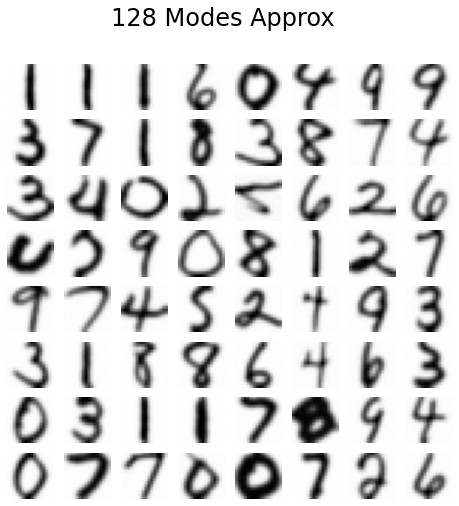

In [14]:
plot_digits(reconstruction(X_train, 128), 8, "128 Modes Approx" )

In [15]:
def explained_variance(N):
  pca = PCA(N)
  pca.fit(X_train)
  explained_variance = sum(pca.explained_variance_ratio_)

  return explained_variance

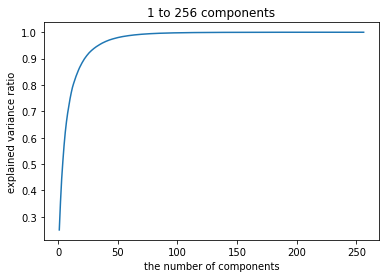

In [16]:
plt.plot(range(1,257), [explained_variance(x) for x in range(1,257)])
plt.xlabel('the number of components')
plt.ylabel('explained variance ratio')
plt.title('1 to 256 components')
plt.show()

In [17]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

def Ridge_reg(digit1, digit2, X_train, Y_train, X_test, Y_test):
  X_bin_train = X_train[np.where((Y_train == digit1) | (Y_train == digit2))]
  Y_bin_train = Y_train[np.where((Y_train == digit1) | (Y_train == digit2))]

  A_train = pca.transform(X_bin_train)
  b_train = np.where(Y_bin_train == digit1, -1, 1)

  X_bin_test = X_test[np.where((Y_test == digit1) | (Y_test == digit2))]
  Y_bin_test = Y_test[np.where((Y_test == digit1) | (Y_test == digit2))]

  A_test = pca.transform(X_bin_test)
  b_test = np.where(Y_bin_test == digit1, -1, 1)

  classifier = RidgeCV(alphas=10**np.linspace(-4,4,9), scoring='neg_mean_squared_error') # alpha is our lambda
  classifier.fit(A_train, b_train)

  b_train_predict = classifier.predict(A_train)
  b_test_predict = classifier.predict(A_test)

  b_train_predict_bin = np.where(b_train_predict <= 0, -1, 1)
  b_test_predict_bin = np.where(b_test_predict <= 0, -1, 1)

  print((digit1,digit2))
  print("best alpha =", classifier.alpha_)

  print("MSE_train =", mean_squared_error(b_train, b_train_predict))
  print("MSE_test =", mean_squared_error(b_test, b_test_predict))

  print("train confusion matrix", '\n', confusion_matrix(b_train, b_train_predict_bin))
  print("test confusion matrix", '\n', confusion_matrix(b_test, b_test_predict_bin))

  plt.plot(range(1,17), classifier.coef_)
  plt.title("the weights of beta")
  plt.xlabel("beta index")
  plt.ylabel("coefficient")
  plt.show()

  print("most important mode: ", np.argmax(classifier.coef_)+1)

(1, 8)
best alpha = 10.0
MSE_train = 0.07545530727256664
MSE_test = 0.08258798535720961
train confusion matrix 
 [[277   1]
 [  3 174]]
test confusion matrix 
 [[71  1]
 [ 1 23]]


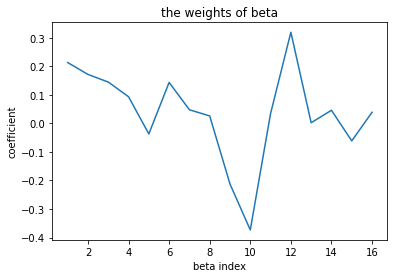

most important mode:  12


In [18]:
pca = PCA(16)
pca.fit(X_train)

Ridge_reg(1, 8, X_train, Y_train, X_test, Y_test)

(3, 8)
best alpha = 10.0
MSE_train = 0.18122534008216976
MSE_test = 0.25913365425686485
train confusion matrix 
 [[171   3]
 [  3 174]]
test confusion matrix 
 [[42  6]
 [ 0 24]]


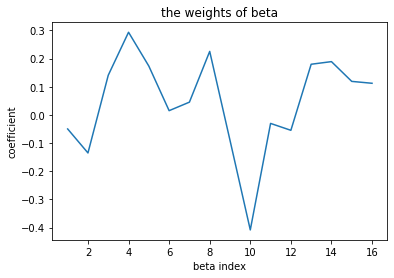

most important mode:  4


In [19]:
Ridge_reg(3, 8, X_train, Y_train, X_test, Y_test)

(2, 7)
best alpha = 10.0
MSE_train = 0.09284708588057863
MSE_test = 0.13143035700637692
train confusion matrix 
 [[180   0]
 [  2 169]]
test confusion matrix 
 [[52  1]
 [ 1 44]]


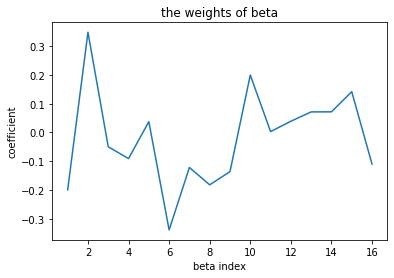

most important mode:  2


In [20]:
Ridge_reg(2, 7, X_train, Y_train, X_test, Y_test)

(-5.0, 5.0)

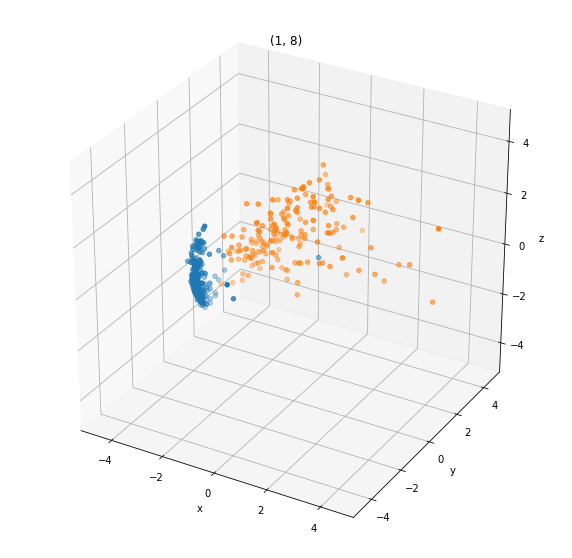

In [21]:
X_1_train = X_train[np.where(Y_train == 1)]
X_8_train = X_train[np.where(Y_train == 8)]

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(pca.transform(X_1_train)[:,0], pca.transform(X_1_train)[:,1], pca.transform(X_1_train)[:,2])
ax.scatter3D(pca.transform(X_8_train)[:,0], pca.transform(X_8_train)[:,1], pca.transform(X_8_train)[:,2])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('(1, 8)')
ax.set_xlim(-5,+5); ax.set_ylim(-5,+5); ax.set_zlim(-5,+5)

(-5.0, 5.0)

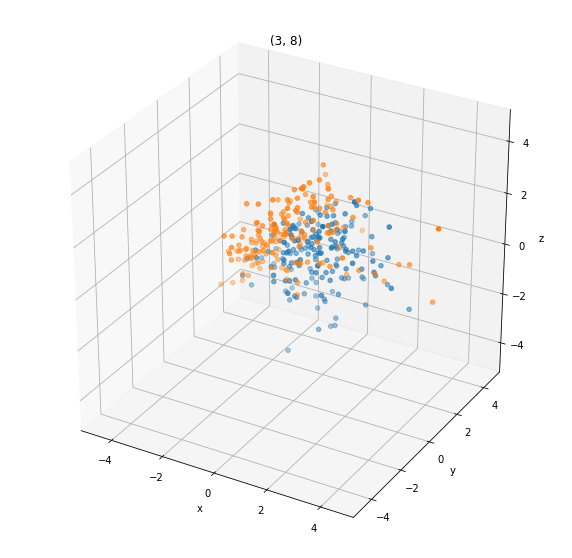

In [22]:
X_3_train = X_train[np.where(Y_train == 3)]
X_8_train = X_train[np.where(Y_train == 8)]

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(pca.transform(X_3_train)[:,0], pca.transform(X_3_train)[:,1], pca.transform(X_3_train)[:,2])
ax.scatter3D(pca.transform(X_8_train)[:,0], pca.transform(X_8_train)[:,1], pca.transform(X_8_train)[:,2])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('(3, 8)')
ax.set_xlim(-5,+5); ax.set_ylim(-5,+5); ax.set_zlim(-5,+5)

(-5.0, 5.0)

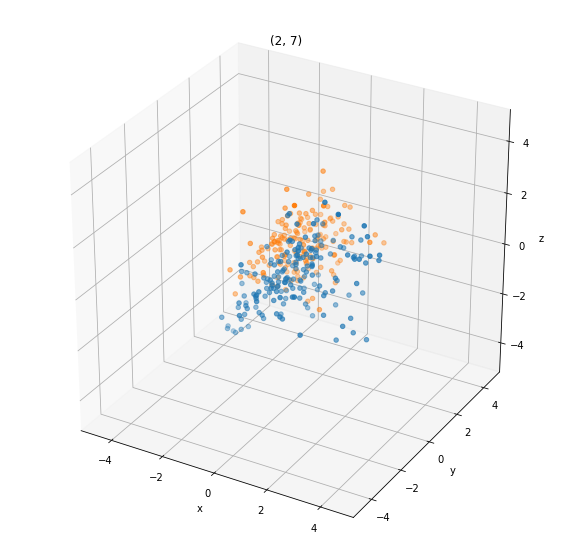

In [23]:
X_2_train = X_train[np.where(Y_train == 2)]
X_7_train = X_train[np.where(Y_train == 7)]

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(pca.transform(X_2_train)[:,0], pca.transform(X_2_train)[:,1], pca.transform(X_2_train)[:,2])
ax.scatter3D(pca.transform(X_7_train)[:,0], pca.transform(X_7_train)[:,1], pca.transform(X_7_train)[:,2])
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('(2, 7)')
ax.set_xlim(-5,+5); ax.set_ylim(-5,+5); ax.set_zlim(-5,+5)